In [1]:
import numpy as np
import pandas as  pd 
import matplotlib.pyplot as plt
import import_ipynb
import Part3
from matplotlib.backends.backend_pdf import PdfPages

importing Jupyter notebook from Part3.ipynb


In [2]:
#Part 4
df = pd.read_table("auto-mpg.data" , header = None,sep='\s+' , names= 
    ["mpg" ,"cylinders", "displacement", "horsepower","weight",
                    "accelaration","model_year","origin","car_name"])
#remove incomplete data
df = df[df.horsepower != '?']
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
Y_mpg = df['mpg'].values
Y_mpg = Y_mpg.reshape(392,1)

Y_mpg_train = Y_mpg[0:292]
Y_mpg_test = Y_mpg[292:392]


In [4]:
df = df.drop(['mpg', 'car_name'], axis=1) # (392, 7)
df

,cylinders,displacement,horsepower,weight,accelaration,model_year,origin
0,4,85.0,70.00,2070.0,18.6,78,3
1,6,225.0,100.0,3630.0,17.7,77,1
2,4,134.0,96.00,2702.0,13.5,75,3
3,4,98.0,79.00,2255.0,17.7,76,1
4,6,225.0,105.0,3439.0,15.5,71,1
...,...,...,...,...,...,...,...
387,4,116.0,81.00,2220.0,16.9,76,2
388,4,121.0,80.00,2670.0,15.0,79,1
389,4,108.0,75.00,2265.0,15.2,80,3
390,8,318.0,150.0,4096.0,13.0,71,1


In [5]:
labels = df.columns # (7,)

In [6]:
X = df.values # (392, 7)
X = X.astype('float64')
X

array([[  4. ,  85. ,  70. , ...,  18.6,  78. ,   3. ],
       [  6. , 225. , 100. , ...,  17.7,  77. ,   1. ],
       [  4. , 134. ,  96. , ...,  13.5,  75. ,   3. ],
       ...,
       [  4. , 108. ,  75. , ...,  15.2,  80. ,   3. ],
       [  8. , 318. , 150. , ...,  13. ,  71. ,   1. ],
       [  8. , 455. , 225. , ...,  10. ,  70. ,   1. ]])

In [7]:
pp = PdfPages('Part4Plot.pdf')

cylinders train data MSE 0-order : 60.70968697222743
cylinders test data MSE 0-order : 60.929283575717776
cylinders train data MSE 1-order : 24.396566146233173
cylinders test data MSE 1-order : 22.926875687221933
cylinders train data MSE 2-order : 24.096383426493833
cylinders test data MSE 2-order : 23.21421758390178
cylinders train data MSE 3-order : 22.12637208568825
cylinders test data MSE 3-order : 20.910250976659675


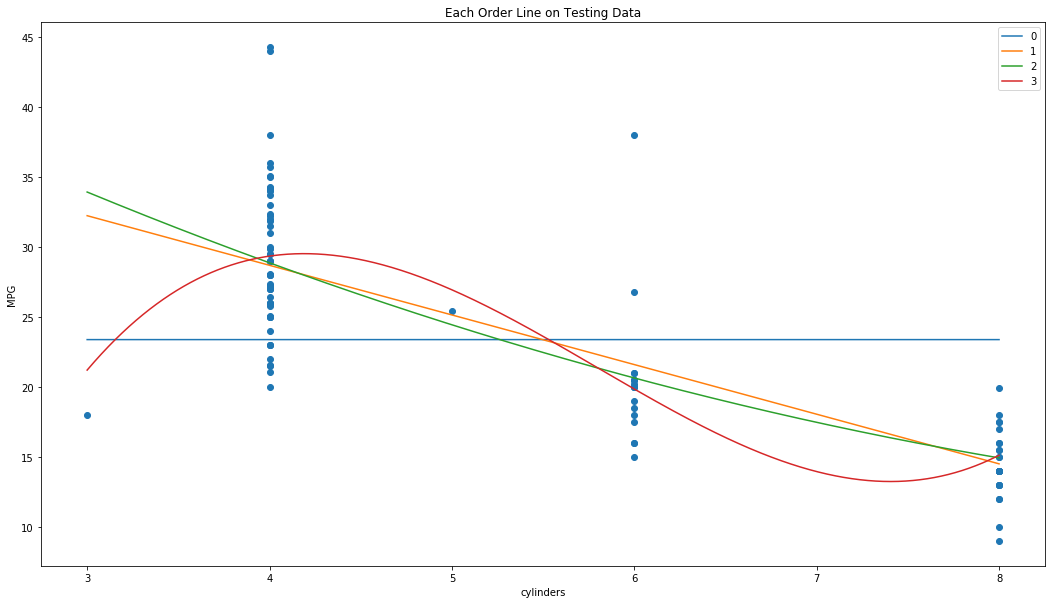



displacement train data MSE 0-order : 60.70968697222743
displacement test data MSE 0-order : 60.929283575717776
displacement train data MSE 1-order : 21.418198865163465
displacement test data MSE 1-order : 21.397638053344693
displacement train data MSE 2-order : 18.92742722510475
displacement test data MSE 2-order : 18.947021423053798
displacement train data MSE 3-order : 32.340624262694625
displacement test data MSE 3-order : 39.096889071974886


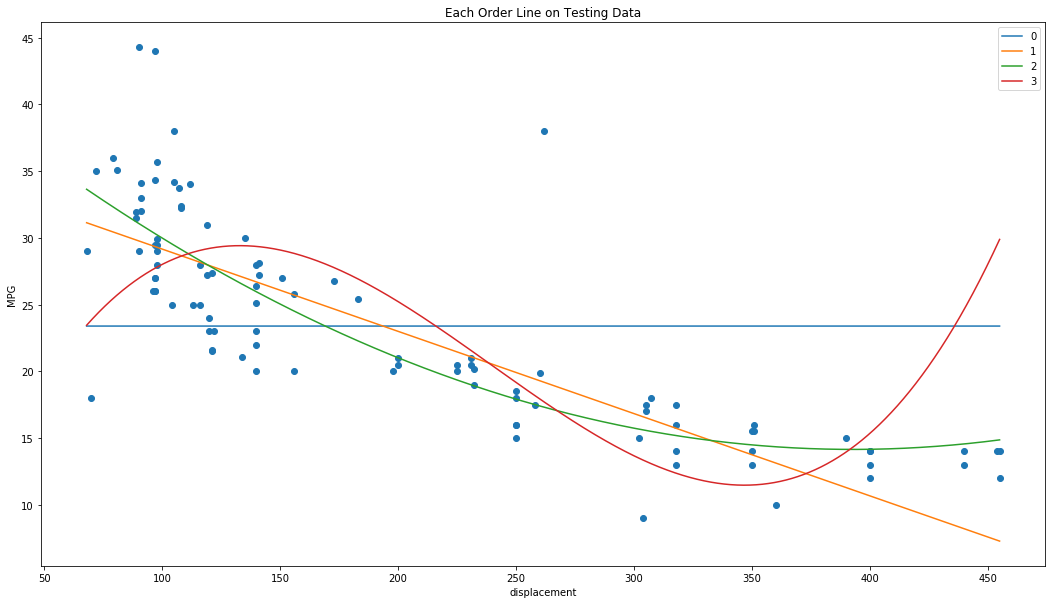



horsepower train data MSE 0-order : 60.70968697222743
horsepower test data MSE 0-order : 60.929283575717776
horsepower train data MSE 1-order : 24.771124548238937
horsepower test data MSE 1-order : 21.819889438529295
horsepower train data MSE 2-order : 20.80204875939535
horsepower test data MSE 2-order : 13.766662814383267
horsepower train data MSE 3-order : 28.22772891865271
horsepower test data MSE 3-order : 26.63451562991671


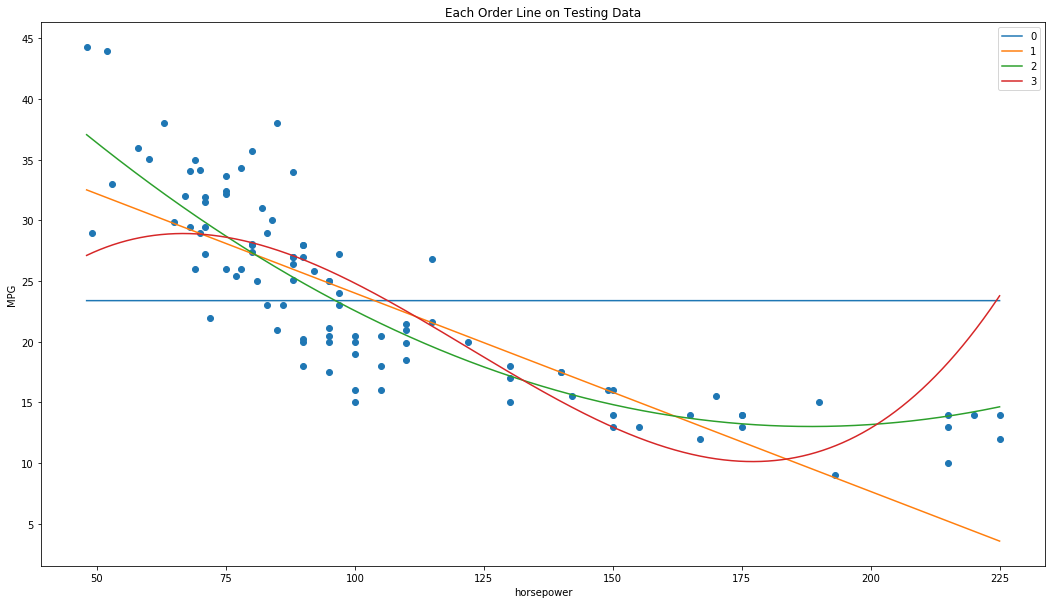



weight train data MSE 0-order : 60.70968697222743
weight test data MSE 0-order : 60.929283575717776
weight train data MSE 1-order : 18.657570068329402
weight test data MSE 1-order : 18.9551078756951
weight train data MSE 2-order : 36.4699613209395
weight test data MSE 2-order : 37.79488418929586
weight train data MSE 3-order : 88.18910088889236
weight test data MSE 3-order : 98.05058857175298


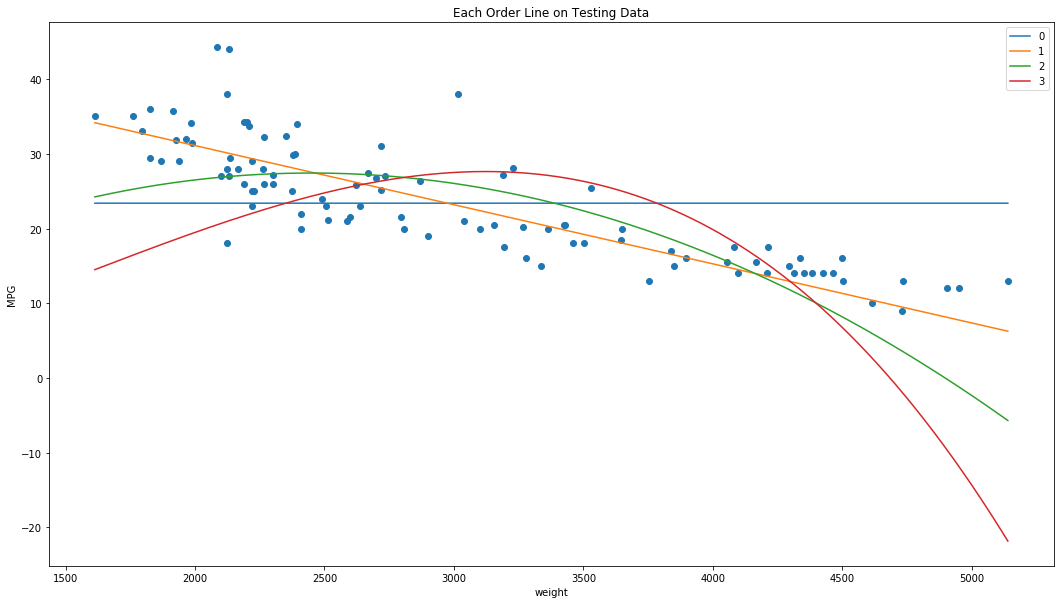



accelaration train data MSE 0-order : 60.70968697222743
accelaration test data MSE 0-order : 60.929283575717776
accelaration train data MSE 1-order : 50.650394668976574
accelaration test data MSE 1-order : 47.63229461694219
accelaration train data MSE 2-order : 49.16701028072591
accelaration test data MSE 2-order : 49.14373990987934
accelaration train data MSE 3-order : 49.15242843248649
accelaration test data MSE 3-order : 49.713252446021485


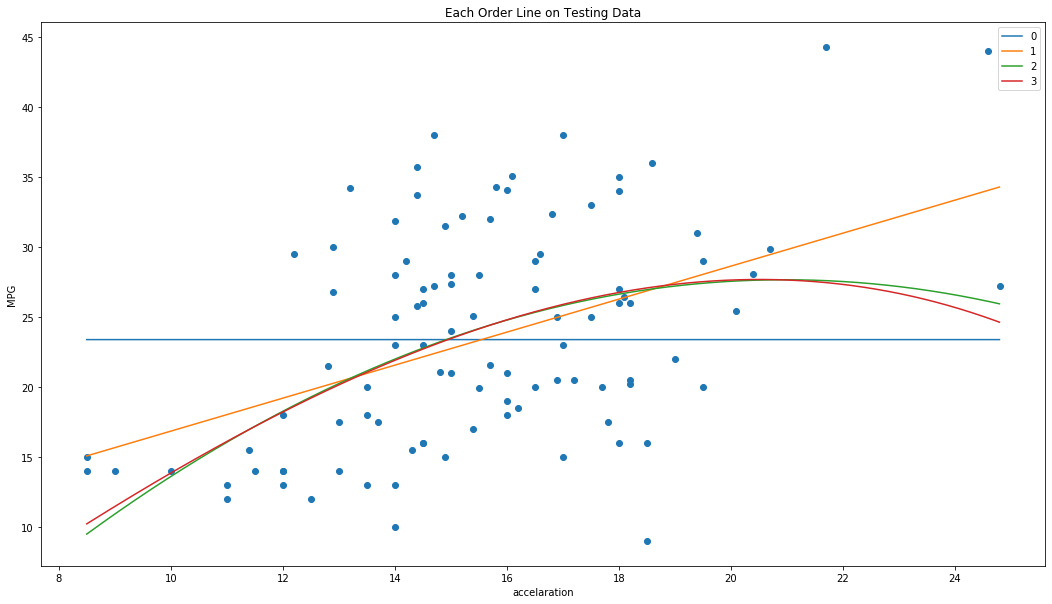



model_year train data MSE 0-order : 60.70968697222743
model_year test data MSE 0-order : 60.929283575717776
model_year train data MSE 1-order : 40.33284929127318
model_year test data MSE 1-order : 40.22255828510213
model_year train data MSE 2-order : 38.889656011345046
model_year test data MSE 2-order : 37.21569046687062
model_year train data MSE 3-order : 38.94960156514158
model_year test data MSE 3-order : 37.18231997708316


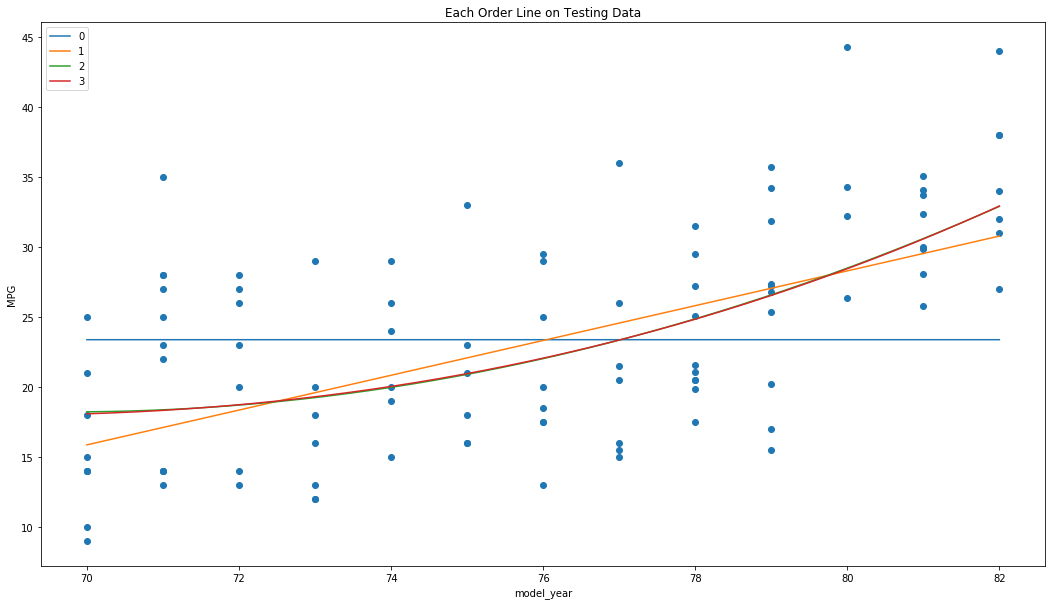



origin train data MSE 0-order : 60.70968697222743
origin test data MSE 0-order : 60.929283575717776
origin train data MSE 1-order : 39.22836735189238
origin test data MSE 1-order : 47.716918285794655
origin train data MSE 2-order : 39.04390948853484
origin test data MSE 2-order : 46.03598745281911
origin train data MSE 3-order : 39.04390948853484
origin test data MSE 3-order : 46.03598745282042


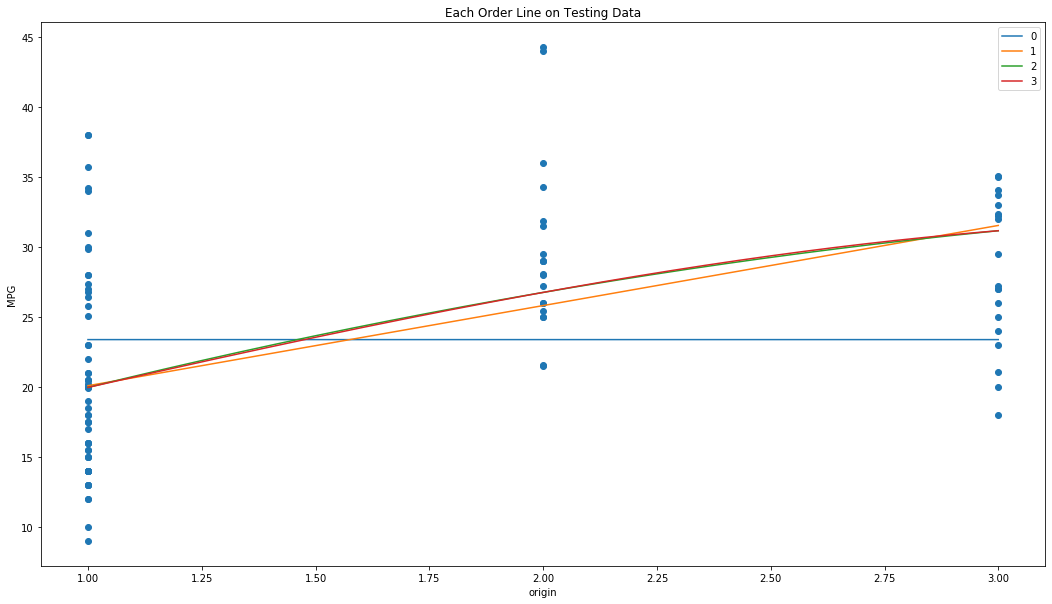

In [8]:
for i in range(X.shape[1]):
    cur_feature = X[:,i].reshape(392,1).astype('float64')
    cur_feature_train = cur_feature[0:292]
    cur_feature_test = cur_feature[292:392]
    
    X_newv = np.arange(min(cur_feature_test), max(cur_feature_test), ( max(cur_feature_test) - min(cur_feature_test))/10000)  
    X_newv = X_newv.reshape(X_newv.shape[0],1)
    fig = plt.figure(figsize=(18, 10))
    plt.scatter(cur_feature_test,Y_mpg_test)

    
    for j in range(4):
        theta, ft_train_exp = Part3.ols(cur_feature_train, Y_mpg_train, j)
        hyp_train = np.dot(ft_train_exp, theta)
        mse_train = Part3.MSE(hyp_train, Y_mpg_train)
        print(labels[i] + " train data MSE " + str(j) + "-order " + ": " + str(mse_train))
        cur_test_ft_exp = Part3.feature_expander(cur_feature_test, j)
        
        hyp_test = np.dot(cur_test_ft_exp, theta)
        mse_test = Part3.MSE(hyp_test, Y_mpg_test)
        print(labels[i] + " test data MSE " + str(j) + "-order " + ": " + str(mse_test))
    
    
        X_new = Part3.feature_expander(X_newv, j)                           #Bump up features to plot
        plot_predictions = np.dot(X_new, theta)                      #Find predictions
        plt.plot(X_newv, plot_predictions, label = j)                              #Plot predictions
        plt.xlabel(labels[i])
        plt.ylabel("MPG")
        plt.legend()
        plt.title("Each Order Line on Testing Data")
       
    plt.show()
    pp.savefig(fig)
    print('\n')
    
pp.close()